In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import scipy
import MinkowskiEngine as ME

/home/nguyen.trungh/.conda/envs/hieu2.0/lib/python3.10/site-packages/MinkowskiEngine-0.5.4-py3.10-linux-x86_64.egg/MinkowskiEngine/__init__.py:36: UserWarning: The environment variable `OMP_NUM_THREADS` not set. MinkowskiEngine will automatically set `OMP_NUM_THREADS=16`. If you want to set `OMP_NUM_THREADS` manually, please export it on the command line before running a python script. e.g. `export OMP_NUM_THREADS=12; python your_program.py`. It is recommended to set it below 24.
  warnings.warn(


In [55]:
input_size=[4,4]
num_samples=1
sparsity=0.05
seed=2
r = np.random.default_rng(seed=seed)
size = tuple([num_samples] + input_size)
_mask = r.random(size=size) < sparsity
# _mask = scipy.ndimage.binary_dilation(_mask[0], iterations=1, structure=np.ones((3,3)))[np.newaxis,...]
_mask = np.array([
    [0,0,0,0],
    [0,0,1,0],
    [0,1,1,0],
    [0,0,0,0],
])[np.newaxis,...]
mask = torch.tensor(_mask).to_sparse().coalesce()
indices = mask.indices().permute(1,0).type(torch.int32).contiguous()
print(indices.shape)
features = r.random(size=(len(indices),1))
features = np.ones_like(features)
features = torch.tensor(features).float()

torch.Size([3, 3])


In [56]:
x = ME.SparseTensor(features=features.cuda(), coordinates=indices.contiguous().cuda(), tensor_stride=2)
# x = ME.SparseTensor(features=features.cuda(), coordinates=indices.contiguous().cuda())

In [35]:
x.coordinates.shape, x.F.shape

(torch.Size([4, 3]), torch.Size([4, 1]))

In [6]:
x.dense()[0].shape

torch.Size([1, 1, 32, 32])

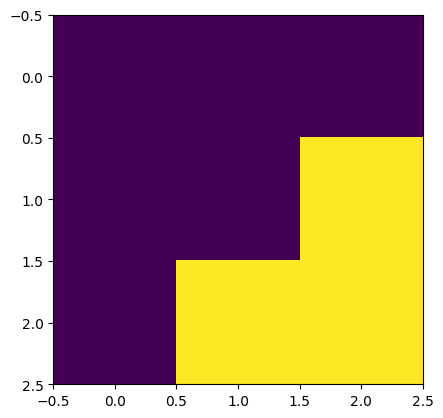

In [57]:
plt.imshow(x.dense()[0][0,0].detach().cpu().numpy())
plt.show()

In [62]:
conv = ME.MinkowskiConvolution(in_channels=1, out_channels=1, kernel_size=2, stride=2, bias=True, dimension=2)
nn.init.constant_(conv.kernel, 1.)
nn.init.constant_(conv.bias, 0.)
conv = conv.cuda()
z = conv(x)
len(z.coordinates), len(x.coordinates)

(3, 3)

In [64]:
z.C, z.F

(tensor([[0, 0, 2],
         [0, 2, 0],
         [0, 2, 2]], device='cuda:0', dtype=torch.int32),
 tensor([[1.],
         [1.],
         [1.]], device='cuda:0', grad_fn=<AddBackward0>))

In [46]:
z.dense()[0].shape

torch.Size([1, 1, 16, 16])

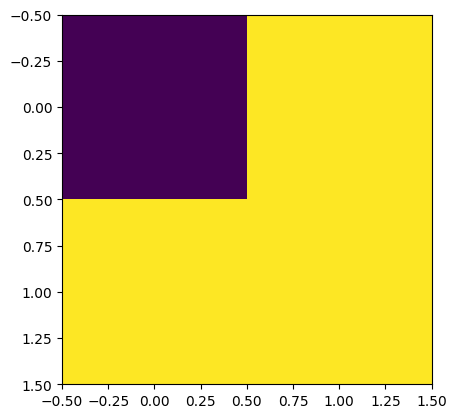

In [63]:
plt.imshow(z.dense()[0][0,0].detach().cpu().numpy())
plt.show()


In [9]:
deconv = ME.MinkowskiGenerativeConvolutionTranspose(in_channels=1, out_channels=1, kernel_size=3, stride=2, bias=True, dimension=2)
nn.init.constant_(deconv.kernel, 1.)
nn.init.constant_(deconv.bias, 0.)
deconv = deconv.cuda()
xxx = deconv(x)
len(xxx.coordinates), len(x.coordinates)

(620, 287)

In [10]:
plt.imshow(xxx.dense()[0][0,0].detach().cpu().numpy())
plt.show()

ValueError: Coordinate has a negative value: tensor([[-1, -1]], device='cuda:0', dtype=torch.int32). Please provide min_coordinate argument

In [1]:
60*24/3*20

9600.0

In [2]:
29000*8/1186


195.61551433389545